In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import load_iris

In [4]:
dataset = load_iris()

In [5]:
print(dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
X,y = dataset.data, dataset.target

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,25,10),max_iter=1000,activation='relu',alpha=0.0001,learning_rate='adaptive',learning_rate_init=0.01)

In [10]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25, 10), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=1000)

In [11]:
y_pred = mlp.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test,y_pred)
print("accuracy score is: ",accuracy)

accuracy score is:  1.0


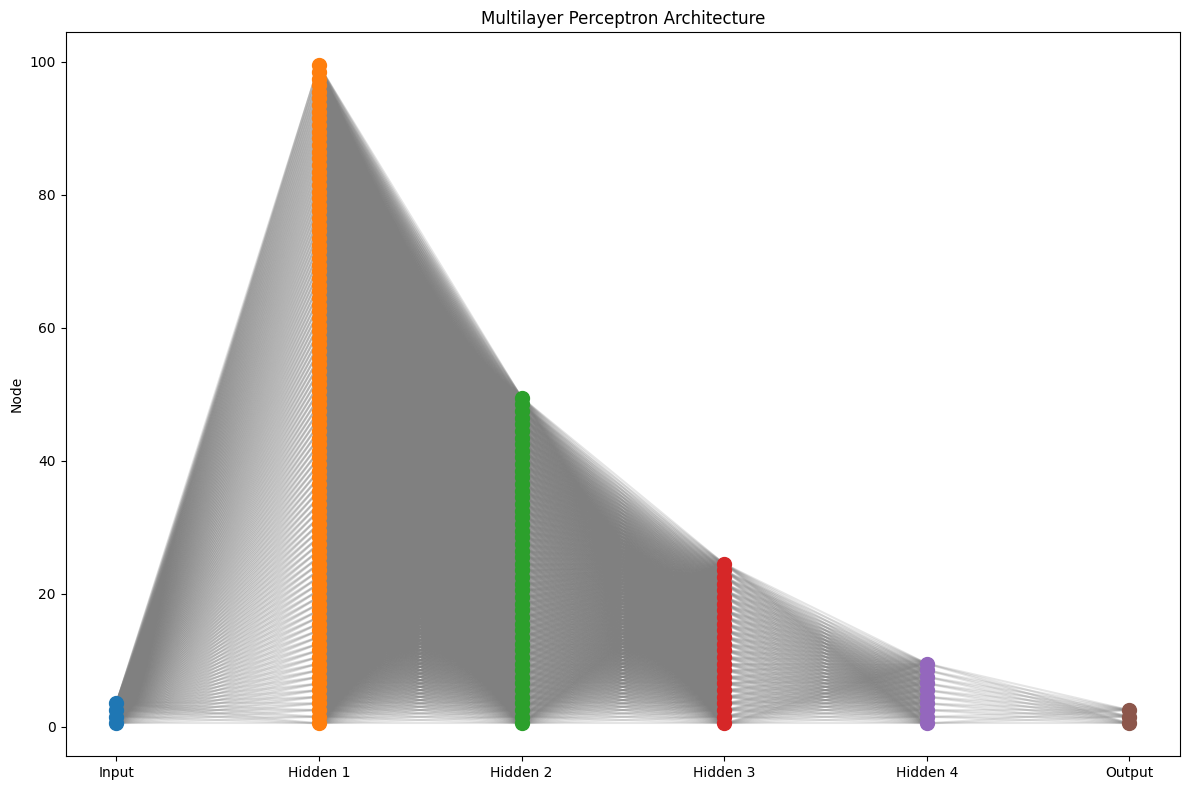

In [15]:
def plot_mlp(mlp):
    # Get the number of layers and their sizes
    layer_sizes = [mlp.n_features_in_] + list(mlp.hidden_layer_sizes) + [mlp.n_outputs_]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot nodes
    for i, layer_size in enumerate(layer_sizes):
        layer_nodes = np.arange(layer_size) + 0.5
        ax.scatter([i] * layer_size, layer_nodes, s=100, zorder=4)
    
    # Plot edges
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                ax.plot([i, i + 1], [j + 0.5, k + 0.5], 'gray', alpha=0.2)
    
    # Set labels and title
    ax.set_xticks(range(len(layer_sizes)))
    ax.set_xticklabels(['Input'] + [f'Hidden {i+1}' for i in range(len(layer_sizes) - 2)] + ['Output'])
    ax.set_ylabel('Node')
    ax.set_title('Multilayer Perceptron Architecture')
    
    plt.tight_layout()
    plt.show()

plot_mlp(mlp)